## Data preprocessing and regression model for a retail company where we recorded customer's country name, age, salary, and wether they bought the product or not
Use sci-kit library's SimpleImputer and OneHotEncoder to do preprocessing of the data \
In the data set: Features are independent variable, dependent variable vector \
Dependent variable we would keep as the last coloumn \
We build the machine learning model using Linear and Polynomial regression method 

In [22]:
#Step-1: Load python libraries
import numpy as np           #for array
import pandas as pd          #for panda dataframe to import data from CSV
import matplotlib.pyplot as plt  #for plots 

In [23]:
#Step-2 import data sets from CSV file
dataset = pd.read_csv("Project1_Data_PreprocessingAndRegression.csv")
X = dataset.iloc[:,0].values  #All rows but 1st coloumn
X2 = dataset.iloc[:,1].values #All rows but 2nd coloumn
X3 = dataset.iloc[:,2].values #All rows but 3rd coloumn
XX = dataset.iloc[:,0:-1].values #All rows and all coloumn except last coloumn
y = dataset.iloc[:,-1].values #All rows but the last coloumn
print(XX[1][0])
print("My output")
print(XX)
print(y)

Spain
My output
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [24]:
#Handling missing data
#Use sci-kit data science library
#Sci-kit is used for various data preprocessing and analysis
#More 50% of work is done using sci-kit learn

#(1) Fill it using average, (or median or most frequent value) of the numbers in the coloumn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
XXNew = np.copy(XX)
XD = np.copy(XX)
imputer.fit(XXNew[:,1:3])
XD[:,1:3] = imputer.transform(XXNew[:,1:3])
print(XX)
print(XD)
print(XXNew)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [25]:
#Encoding categorical data
#Three countries in a coloumn: France, Spain, Germany
#Best to create 3 elements coloumn vector like [1,0,0], [0,1,0], [0,0,1]

#(1) OneHotEncoder class (Independent variables) from sci-kit library
print(XD)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0] )], remainder='passthrough')
XD = np.array( ct.fit_transform(XD) )
print(XD)


#(2) LabelEncoder class (Dependent variables) from sci-kit library
# Transform "Yes" and "No" into 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
[0 1 0 0 1 1 0 1 0 1]


In [26]:
#Splitting the dataset into Training Set and Test Set
#Again we use sci-kit library

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XD, y, test_size =0.2, random_state=1)

print(X_train, "New tab \t \n \n", X_test, "\t", y_train, "\t", y_test)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]] New tab 	 
 
 [[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]] 	 [0 1 0 0 1 1 0 1] 	 [0 1]


In [27]:
#Feature scaling of Input data, use sci-kit library
#i.e. standardization of input X into gaussian distributed -3 to +3 or normalized between 0 and 1.
#Gaussian or standard transformation will convert between -3 to +3
#Normalized transformation will convert them between 0 to 1

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
#X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])

#print(X_train, "\t", X_test)


In [28]:
#Multiple linear Regression model on Training set
#Again use sci-kit library

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prod = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(X_train, y_train, X_test, y_test)
print(y_prod, y_test)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]] [0 1 0 0 1 1 0 1] [[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]] [0 1]
[1.46 1.06] [0 1]


[[38.77777777777778]
 [40.0]
 [44.0]
 [38.0]
 [27.0]
 [48.0]
 [50.0]
 [35.0]]
[[1.00e+00 3.88e+01 1.50e+03]
 [1.00e+00 4.00e+01 1.60e+03]
 [1.00e+00 4.40e+01 1.94e+03]
 [1.00e+00 3.80e+01 1.44e+03]
 [1.00e+00 2.70e+01 7.29e+02]
 [1.00e+00 4.80e+01 2.30e+03]
 [1.00e+00 5.00e+01 2.50e+03]
 [1.00e+00 3.50e+01 1.22e+03]]


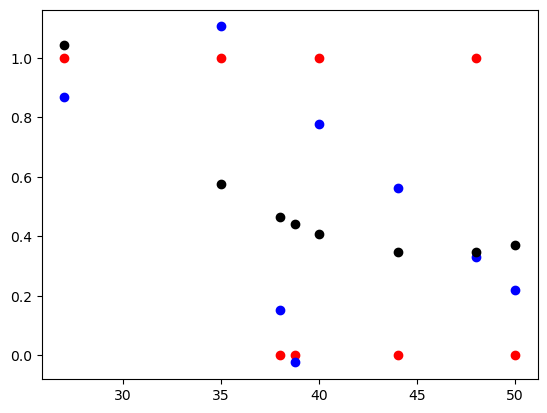

In [29]:
#Polynomial Regression model using sci-kit library
# we use PolynomialFeature class in sci-kit library

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
Xp = X_train[:,3:4]
X_poly = poly_reg.fit_transform(Xp)
print(Xp)
print(X_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y_train)

plt.scatter(X_train[:,3:4], y_train, color='red')
plt.scatter(X_train[:,3:4], regressor.predict(X_train), color='blue' )

plt.scatter(X_train[:,3:4], lin_reg2.predict(X_poly), color='black')